# **Trabalho Prático: Classificação (Fase 2)**

**Alunos:**  
Isabelle Fernandes de Oliveira   
Arthur Gontijo Queiroz da Silveira

## 1. Contexto escolhido e sua relevância
O crescimento do setor fitness e o aumento do uso de tecnologias vestíveis tornam essencial entender os padrões de exercícios dos usuários. A análise desses dados pode subsidiar recomendações personalizadas e aprimorar o engajamento em academias e aplicativos de treino.

O contexto deste projeto consiste na análise de dados de frequentadores de academias, com foco nos seus hábitos de treino. Com o crescimento do setor fitness, as academias e empresas do setor buscam personalizar a experiência do cliente para aumentar a retenção e a satisfação. Dessa forma, entender os padrões de exercícios dos clientes pode subsidiar recomendações personalizadas e aprimorar o engajamento em academias e aplicativos de treino. A classificação do tipo de treino (ex: cardio, musculação, funcional) é fundamental nesse processo, pois possibilita uma segmentação automática e escalável dos usuários, agregando valor tanto para o negócio quanto para o cliente final.

O dataset Gym Members Exercise Dataset, disponível no Kaggle *<https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset>*, fornece uma visão geral detalhada das rotinas de exercícios, atributos físicos e métricas de condicionamento físico dos frequentadores de academias. Ele contém 973 amostras de dados de academias, incluindo indicadores de desempenho, como frequência cardíaca, calorias queimadas e duração do treino, idade, sexo e níveis de experiência.


## 2. Recursos disponíveis, requisitos, suposições, restrições, riscos e contingências

**Recursos disponíveis:**   
- Dataset público disponível na plataforma Kaggle: Gym Members Exercise Dataset;  
- Software Python 3.12.4, Jupyter Notebook, Visual Studio Code 
- Hardware: Computador pessoal com capacidade para processamento dos dados.   

**Requisitos:**   
- Conhecimento básico em técnicas de pré-processamento de dados e algoritmos de classificação.

**Suposições:**   
- Os dados são representativos e confiáveis.   

**Restrições:**   
- Dados limitados a uma amostra específica de usuários, possível viés de representatividade. 
- O tempo para desenvolvimento do projeto é limitado ao cronograma acadêmico definido.  

**Riscos:**
- O modelo pode apresentar um desempenho baixo (baixa acurácia), não atingindo o critério de sucesso.
 
**Contingências:**   
- Serão testados e comparados diferentes algoritmos de classificação (Random Forest, Naive Bayes e Support Vector Machines (SVM)) e será realizado o ajuste de hiperparâmetros para otimizar a performance.

## 3. Objetivos da mineração de dados, detalhamento da tarefa e critérios de sucesso

**Objetivo:**   
- Classificação supervisionada: Desenvolver um modelo de classificação capaz de identificar corretamente o tipo de exercício (workout_type) realizado por usuários com base em variáveis coletadas.   
- Aplicar e comparar algoritmos de classificação: Random Forest, Naive Bayes e Support Vector Machines (SVM).

**Tarefa de Mineração de Dados:**   
1. Limpeza de dados.   
2. Verificação da distribuição das classes de workout_type
3. Identificação de possíveis desbalanceamentos nas classes.
4. Visualizações para detectar padrões, tendências ou outliers.
5. Separação do conjunto em treino e teste (ex.: 80/20).
6. Uso de validação cruzada (k-fold).
7. Utilização de algoritmos de classificação (Random Forest, Naive Bayes e SVM);
8. Avaliar desempenho de cada algoritmo utilizando as métricas: Acurácia, Precisão, Recall, F1-Score, Matriz de Confusão;
9. Análise de importância das variáveis para entender os fatores que mais influenciam a classificação
     
**Critérios de sucesso:**   
- Acurácia geral satisfatória: O modelo deve apresentar uma acurácia significativamente superior ao modelo baseline (modelo com um classificador ingênuo). O modelo baseline a ser adotado consiste em classificar aleatoriamente os dados seguindo uma multinomial com probabilidade verificada na ocorrência da categoria no banco de teste.
- F1-Score por classe: O sucesso será medido pela obtenção de F1-Scores razoavelmente equilibrados entre as classes, evitando que o modelo tenha bom desempenho apenas nas classes majoritárias.
- Matriz de confusão interpretável e com baixo número de erros críticos: O critério de sucesso envolve minimizar falsos positivos e falsos negativos, especialmente entre classes que são semanticamente diferentes (ex: confundir "alongamento" com "cardio").

## 4. Descrição do projeto
O projeto visa aplicar técnicas de mineração de dados, com foco nos algoritmos de classificação Random Forest, Naive Bayes e SVM, para categorizar tipos de exercício físico praticados por membros de academia, a partir de um dataset com informações sobre os treinos realizados. Esses algoritmos foram escolhidos como representantes de suas categorias, a saber: árores de decisão e derivados, probabilístico e método baseado em distância, respectivamente.


## 5. Descrição dos dados
O Gym Members Exercise Dataset contém 973 registros de atividades físicas com variáveis como duração, intensidade, frequência cardíaca, calorias queimadas, entre outras, totalizando 15 colunas.

In [4]:
import pandas as pd

df = pd.read_csv("gym_members_exercise_tracking.csv", sep=",")
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [5]:
df.head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


Abaixo segue a descrição de cada coluna:
- Age: Idade do membro da academia.
- Gender: Sexo do membro da academia (Masculino ou Feminino).
- Weight (kg): Peso do membro em quilogramas.
- Height (m): Altura do membro em metros.
- Max_BPM: Frequência cardíaca máxima (batimentos por minuto) durante as sessões de treino.
- Avg_BPM: Frequência cardíaca média durante as sessões de treino.
- Resting_BPM: Frequência cardíaca em repouso antes do treino.
- Session_Duration (horas): Duração de cada sessão de treino em horas.
- Calories_Curned: Total de calorias queimadas durante cada sessão.
- Workout_Type: Tipo de treino realizado (ex.: Cardio, Força, Yoga, HIIT).
- Fat_Percentage: Percentual de gordura corporal do membro.
- Water_Intake (litros): Ingestão diária de água durante os treinos.
- Workout_Frequency (dias/semana): Número de sessões de treino por semana.
- Experience_Level: Nível de experiência, de iniciante (1) a avançado (3).
- BMI: Índice de Massa Corporal, calculado a partir da altura e do peso.

## 6. Exploração dos dados

In [6]:
print(df.isnull().sum())

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Workout_Type                     0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
dtype: int64


Como pode ser visto, não há nenhum valor null no banco, o que facilita a etapa de limpeza dos dados.

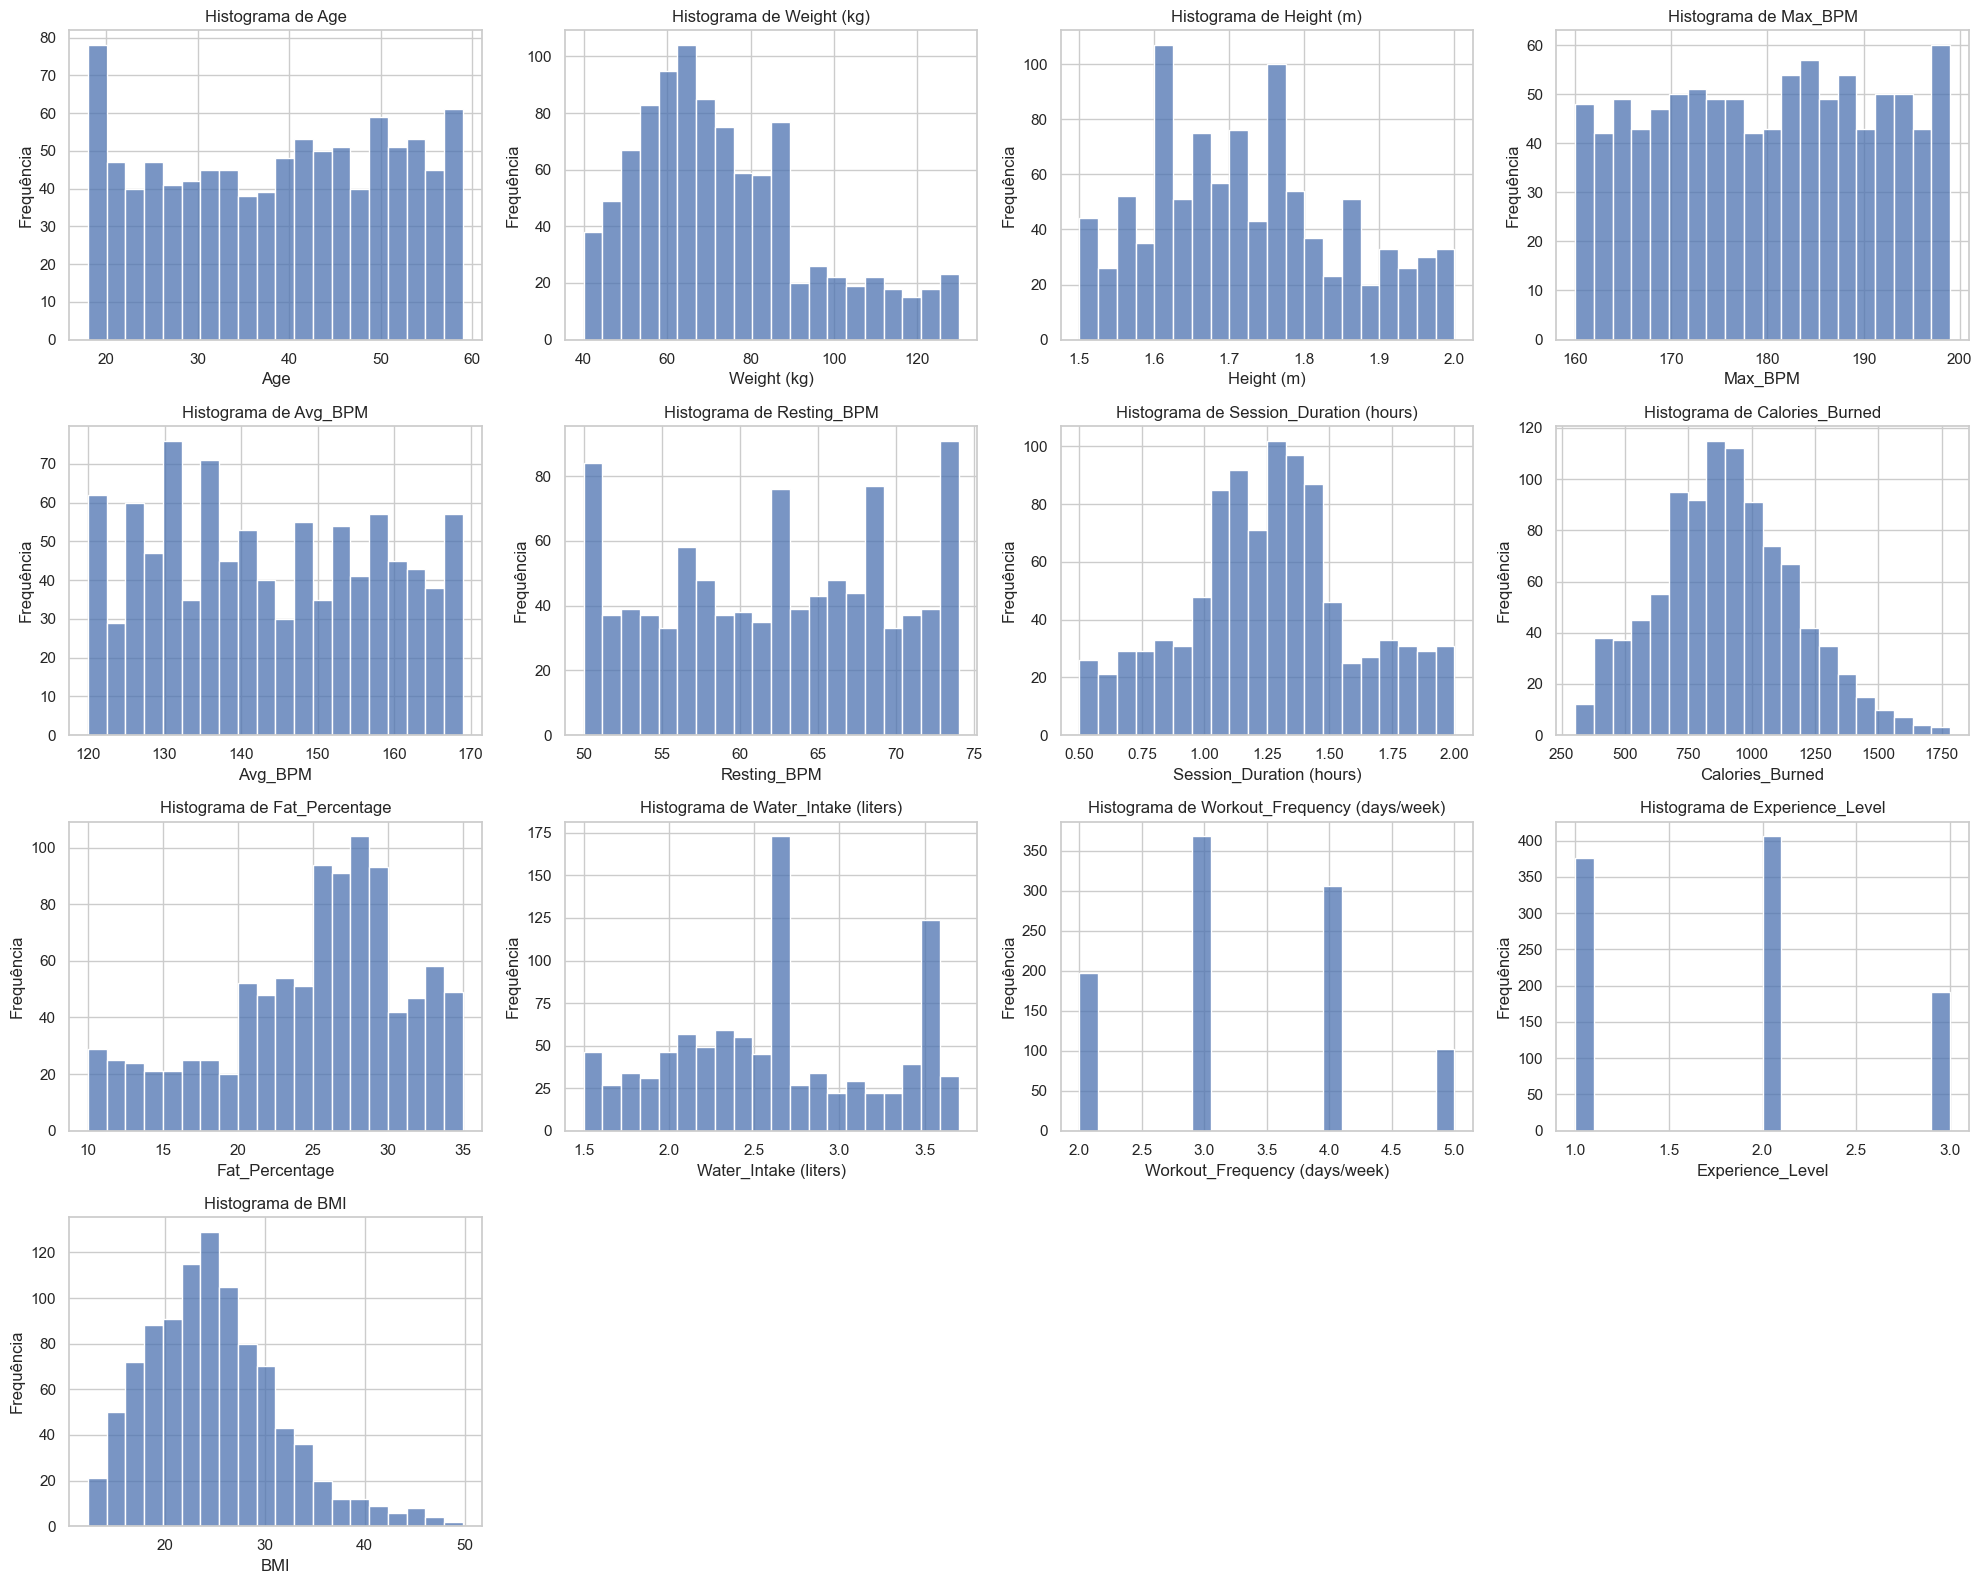

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

numeric_cols = df.select_dtypes(include='number').columns
num_cols = len(numeric_cols)

cols = 4
rows = 4

fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, bins=20, kde=False, ax=axes[i])
    axes[i].set_title(f"Histograma de {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequência")

# Remover subplots vazios
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Na distribuição das variáveis numéricas, é possível observar que elas estão balanceadas.

Também, é possível perceber que para as features `Workout_Frequency (day/week)` e `Experience_Level`, embora estejam como int no banco, elas apresentam características mais próximas de categóricas. Serão, posteriormente transformadas para tal.

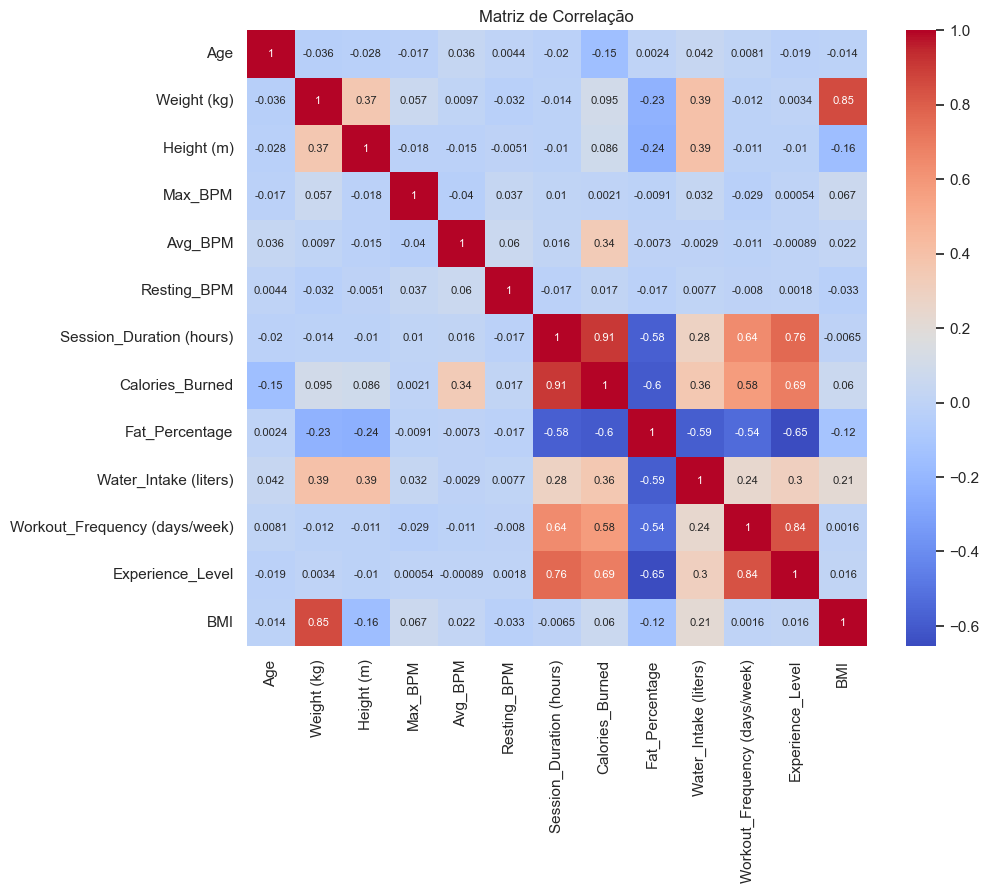

In [8]:
plt.figure(figsize=(10, 8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', annot_kws={'size': 8})
plt.title('Matriz de Correlação')
plt.show()

Na matriz de correlação acima, percebe-se correlações esperadas, como nivel de experiência e quantidade de dias frequentados por semana ou então calorias queimadas e tempo em horas na academia. Correlações mais fortes negativas tambem são visatas, como porcentagem de gordura litros de água ingeridos.

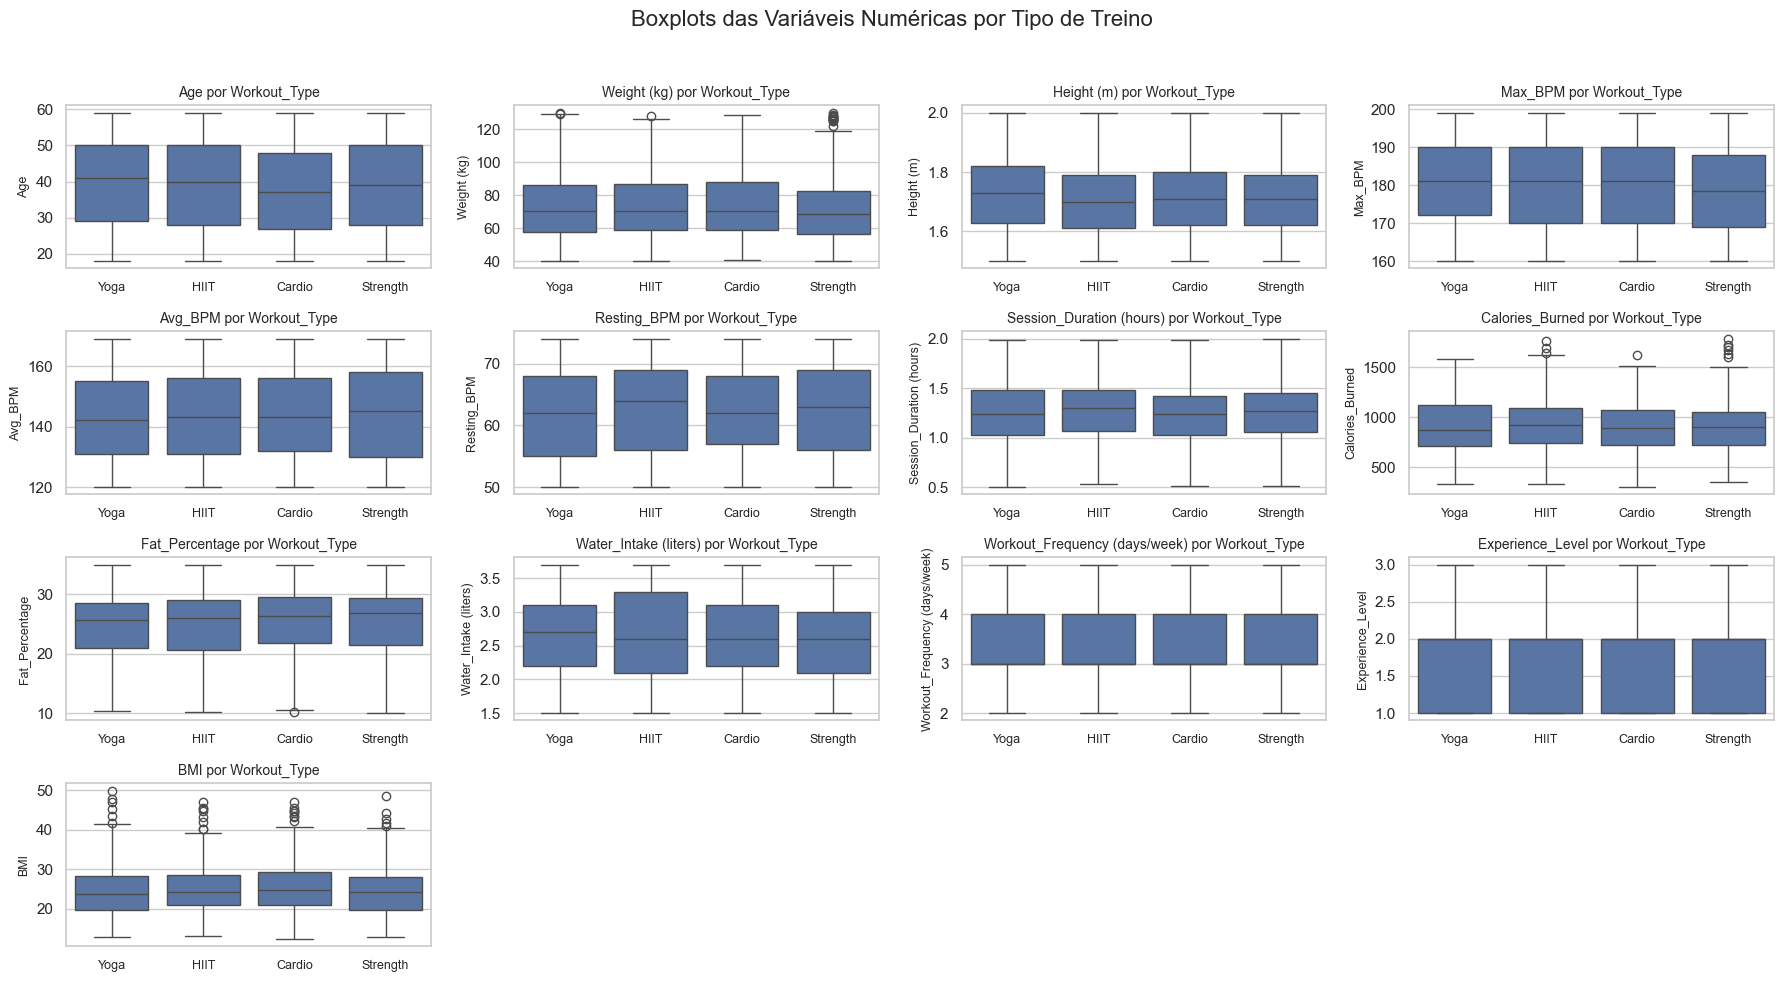

In [9]:
sns.set_theme(style="whitegrid")
n_rows = 4
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))

axes = axes.flatten()
target = 'Workout_Type'

for i, col in enumerate(numeric_cols):
        
    sns.boxplot(data=df, x=target, y=col, ax=axes[i])
    
    axes[i].set_title(f'{col} por {target}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel(col, fontsize=9)
    axes[i].tick_params(axis='x', labelsize=9)

# Remove os plots que nao foram usados
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

fig.suptitle('Boxplots das Variáveis Numéricas por Tipo de Treino', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])


No gráfico acima, percebe-se o comportamente individual de cada variável numérica para diferentes tipos de treinos. O que pode perceber é que a grande maioria das variáveis, quando olhadas isoladamente, não possui um sinal claro para diferenciar os tipos de treino. Ou seja, as medianas, bem como 50% dos dados são muito parecidos para os diferentes tipos de treinos para cada variável. Isso pode ser um fator dificultador para o modelo classificar o tipo de treino.

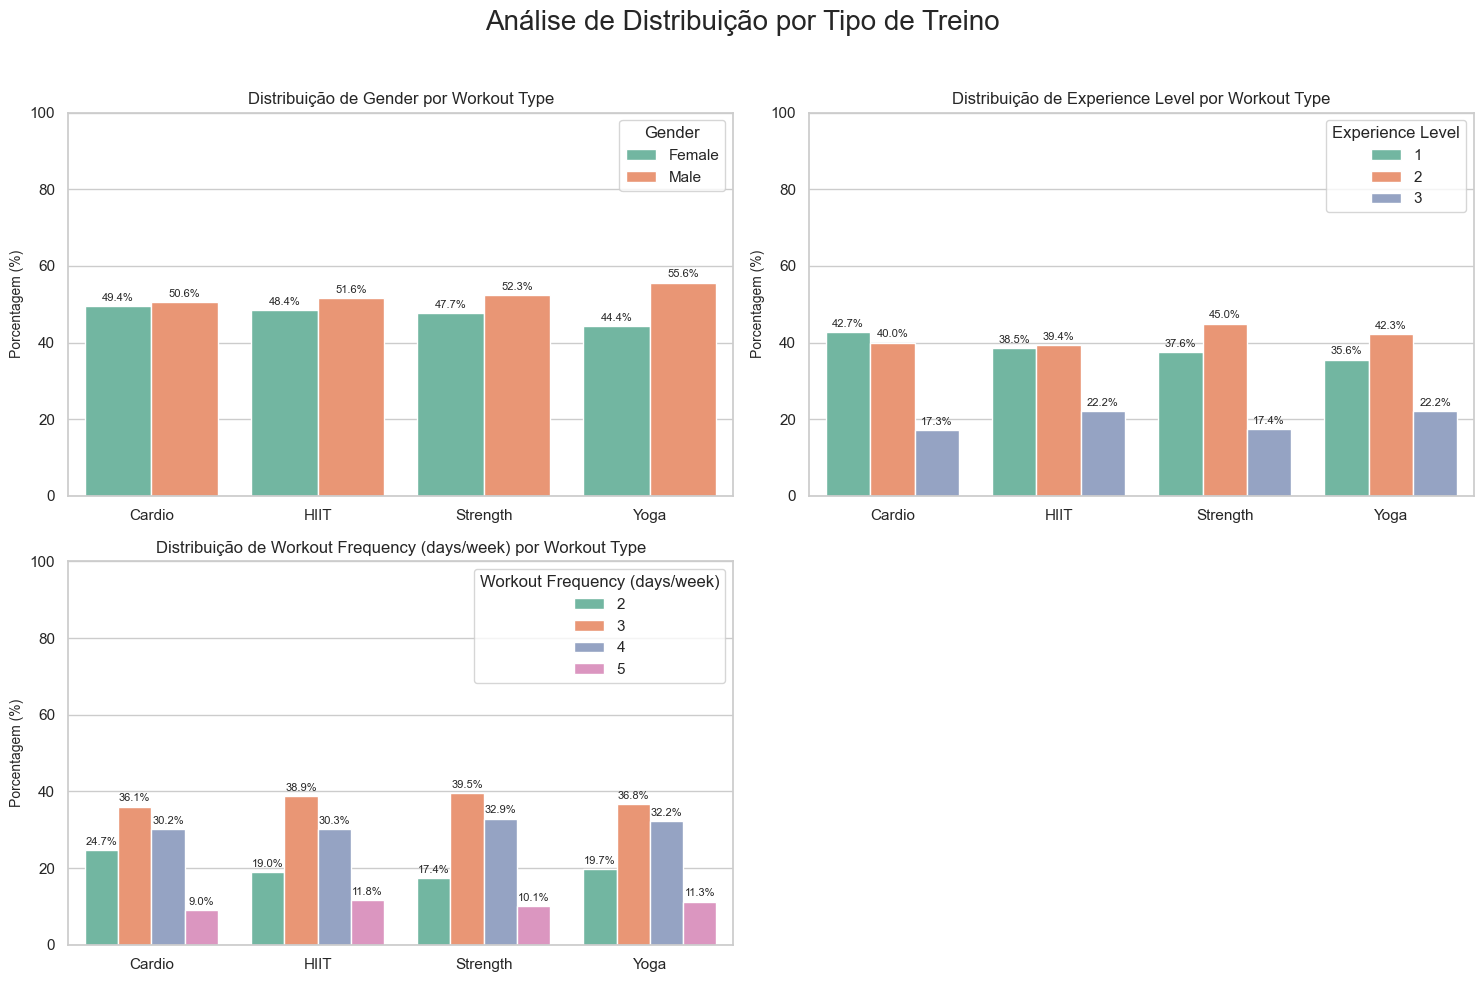

In [10]:
def plotar_em_grid(ax, dataframe, eixo_x, eixo_hue):
    grouped = dataframe.groupby([eixo_x, eixo_hue], observed=True).size().reset_index(name='Count')
    total_per_group = grouped.groupby(eixo_x, observed=True)['Count'].transform('sum')
    grouped['Percentage'] = grouped['Count'] / total_per_group * 100

    sns.barplot(data=grouped, x=eixo_x, y='Percentage', hue=eixo_hue, palette='Set2', ax=ax)

    # Adiciona os rótulos nas barras
    for bar in ax.patches:
        height = bar.get_height()
        if height > 0:
            ax.text(x=bar.get_x() + bar.get_width() / 2, 
                    y=height + 0.8,
                    s=f'{height:.1f}%', 
                    ha='center', va='bottom', fontsize=8)

    # Customiza o eixo específico
    ax.legend(title=eixo_hue.replace('_', ' '))
    ax.set_title(f'Distribuição de {eixo_hue.replace("_", " ")} por {eixo_x.replace("_", " ")}', fontsize=12)
    ax.set_ylabel('Porcentagem (%)', fontsize=10)
    ax.set_xlabel(None) # Remove o rótulo do eixo x para não poluir
    ax.tick_params(axis='x')
    ax.set_ylim(0, 100)

    
colunas_para_plotar = ['Gender', 'Experience_Level', 'Workout_Frequency (days/week)']

# 2. Crie a figura e o grid de eixos (2 linhas, 3 colunas)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, coluna in enumerate(colunas_para_plotar):
    ax_atual = axes.flatten()[i] # Pega o eixo da vez
    plotar_em_grid(ax=ax_atual, dataframe=df, eixo_x='Workout_Type', eixo_hue=coluna)

for j in range(len(colunas_para_plotar), len(axes.flatten())):
    axes.flatten()[j].axis('off')

fig.suptitle('Análise de Distribuição por Tipo de Treino', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta para o título geral não sobrepor os gráficos

plt.show()

Parecido com os gráficos box-plot para as variáveis numéricas, o comportamento da variável categórica para cada tipo de treino é muito parecida. Isso dificulta igualmente o processo preditivo do tipo de exercício para os modelos classificatórios.

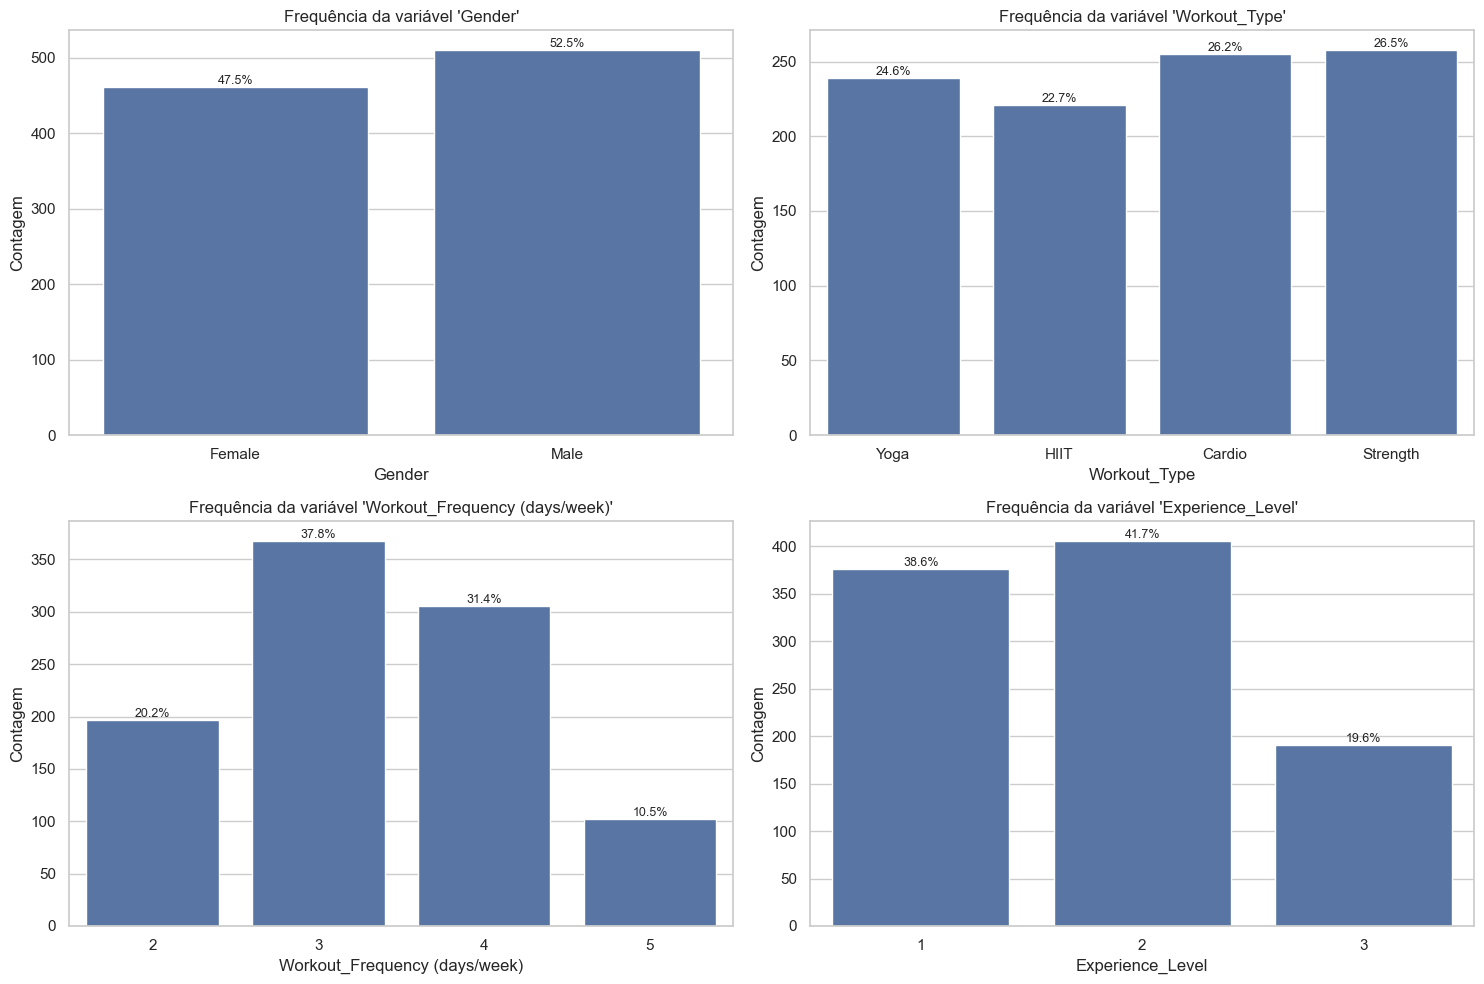

In [11]:
categorical_features = ['Gender', 'Experience_Level', 'Workout_Frequency (days/week)']

for col in categorical_features:
    df[col] = df[col].astype('category')

categorical_cols = df.select_dtypes(include=('object', 'category')).columns
num_cols = len(categorical_cols)

cols = 2
rows = 2

fig, axes = plt.subplots(rows, cols, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    total = len(df)
    sns.countplot(data=df, x=col, ax=ax)
    
    ax.set_title(f"Frequência da variável '{col}'")
    ax.set_xlabel(col)
    ax.set_ylabel("Contagem")
    ax.tick_params(axis='x')
    
    # Adiciona rótulos de porcentagem em cima das barras
    for p in ax.patches:
        height = p.get_height()
        percentage = 100 * height / total
        ax.text(p.get_x() + p.get_width() / 2, height, f'{percentage:.1f}%', 
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


No gráfico acima, percebe-se que para as Gender e Workout_Type, as suas respectivas classes são balanceadas. Para as demais, há uma prevalência para pessoas que vão 2 e 3 vezes por semana à academia e possuem nível de experiência 1 e 2.


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [13]:
target = 'Workout_Type'

# Preparo dos dados
categorical_features = ['Gender', 'Experience_Level', 'Workout_Frequency (days/week)']

for col in categorical_features:
    df[col] = df[col].astype('category')

X = df.drop(columns=[target])
y = df[target]

# Codifica variáveis categóricas
X = pd.get_dummies(X)

# Padronização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Separação treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)

### Métricas da classificação no banco treino

**Validação cruzada**

In [14]:
# Modelos
from sklearn.metrics import f1_score

models = {
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM Radial": SVC(kernel='rbf', random_state=42, probability=True),
    "SVM Linear": SVC(kernel='linear', random_state=42, probability=True),
    "SVM Polinomial": SVC(kernel='poly', degree=3, random_state=42, probability=True)
}

# Avaliação com cross-validation (k=5)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = {}

for name, model in models.items():
    ac = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1_macro')
    cv_results[name] = {
        'Accuracy': ac,
        'F1-Score (Macro)': f1 
    }

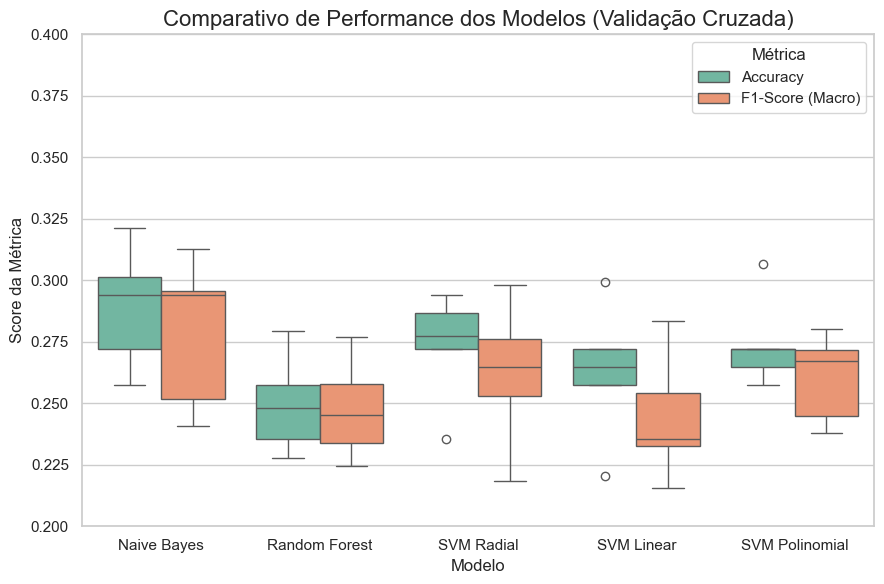

In [15]:
records = []
for model_name, metrics_dict in cv_results.items():
    for metric_name, scores_array in metrics_dict.items():
        for score in scores_array:
            records.append({
                'Modelo': model_name,
                'Métrica': metric_name,
                'Score': score
            })
            
results_df_long = pd.DataFrame(records)

plt.figure(figsize=(9, 6))

# Cria o boxplot agrupado
ax = sns.boxplot(
    data=results_df_long,
    x='Modelo',
    y='Score',
    hue='Métrica', 
    palette='Set2'
)

ax.set_title('Comparativo de Performance dos Modelos (Validação Cruzada)', fontsize=16)
ax.set_ylabel('Score da Métrica', fontsize=12)
ax.set_xlabel('Modelo', fontsize=12)
ax.tick_params(axis='x')
ax.legend(title='Métrica')
ax.set_ylim(0.2, 0.4) 

plt.tight_layout()
plt.show()


No boxsplot acima, é possível observar que o classificador Naive Bayes obteve uma média para ambas as métricas (F1 e Acurácia) superior aos demais classificadores no processo de validação cruzada para o banco treino. Contudo, é um modelo que possui alta variabilidade.

### Métricas da classificação no banco teste

In [16]:

# Avaliacao das metricas precision, recall e f1-score no banco teste
print("Métricas aplicadas ao banco teste \n")

result = {}
y_preds = {}
    
for name, model in models.items():
    model_test = model.fit(X_train, y_train)
    y_pred = model_test.predict(X_test)
    y_preds[name] = y_pred
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    result[name] = {         
        'Accuracy': accuracy,
        'F1-Score (Macro)': f1
        }
    print(f"Classificador {name}")
    print(classification_report(y_test, y_pred), "\n")


Métricas aplicadas ao banco teste 

Classificador Naive Bayes
              precision    recall  f1-score   support

      Cardio       0.23      0.30      0.26        77
        HIIT       0.20      0.17      0.18        66
    Strength       0.23      0.29      0.26        77
        Yoga       0.12      0.07      0.09        72

    accuracy                           0.21       292
   macro avg       0.20      0.21      0.20       292
weighted avg       0.20      0.21      0.20       292
 

Classificador Random Forest
              precision    recall  f1-score   support

      Cardio       0.30      0.32      0.31        77
        HIIT       0.29      0.24      0.26        66
    Strength       0.27      0.31      0.29        77
        Yoga       0.17      0.15      0.16        72

    accuracy                           0.26       292
   macro avg       0.26      0.26      0.26       292
weighted avg       0.26      0.26      0.26       292
 

Classificador SVM Radial
           

In [17]:
pd.DataFrame.from_dict(result, orient='index')


,Accuracy,F1-Score (Macro)
Naive Bayes,0.208904,0.196310
Random Forest,0.260274,0.256296
SVM Radial,0.222603,0.210110
SVM Linear,0.236301,0.223300
SVM Polinomial,0.250000,0.229708


Embora para a validação cruzada na etapa de treino, o modelo Naive Bayes tenha se saído melhor, na aplicação no banco de teste o Random Forest é melhor.

### Matriz de confusão aplicado aos dados de teste

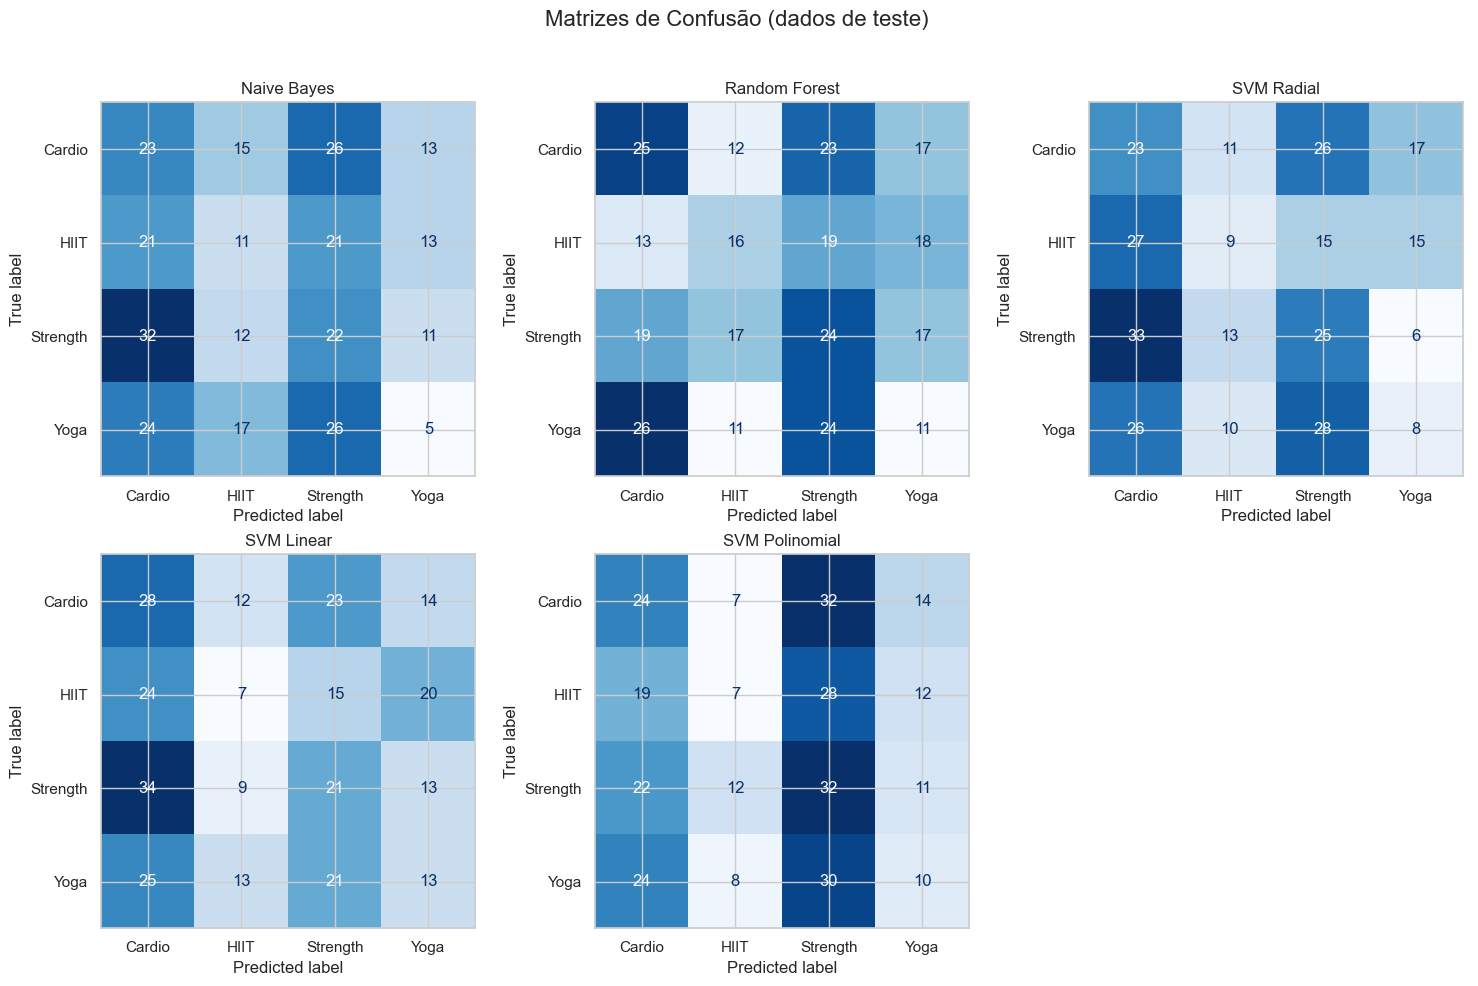

In [18]:
n_models = len(models)
n_cols = 3 
n_rows = (n_models + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))
axes = axes.flatten()

for i, (name, y_pred) in enumerate(y_preds.items()):
    ax = axes[i]
    ConfusionMatrixDisplay.from_predictions(
        y_test, 
        y_pred, 
        ax=ax, 
        cmap="Blues", 
        colorbar=False
    )
    ax.set_title(name)

for j in range(n_models, len(axes)):
    axes[j].axis('off')

fig.suptitle("Matrizes de Confusão (dados de teste)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

A matriz de confusão acima mostra como os modelos estão errando para cada uma das classes. Percebe-se que quanto mais escura for a diagonal principal e mais clara for as demais diagonais, melhor é a predição do modelo. O que pode ser observado é a aleatoriedade das cores na matriz, evidenciando um mau desempenho dos modelos.

### Modelo base de classificação ingênua

In [19]:
# Calcula as probabilidades empíricas de cada classe
class_probs = df['Workout_Type'].value_counts(normalize=True)

# Lista de classes e seus respectivos pesos
classes = class_probs.index.tolist()
probabilities = class_probs.values.tolist()

n_samples = len(y_test)

np.random.seed(42) 
random_preds = np.random.choice(classes, size=n_samples, p=probabilities)
print(classification_report(y_test, random_preds))

accuracy = accuracy_score(y_test, random_preds)
f1 = f1_score(y_test, random_preds, average='macro')

print(f"Acurácia modelo aleatório: {accuracy:.4f}")
print(f"F1_macro modelo aleatório: {f1:.4f}")

              precision    recall  f1-score   support

      Cardio       0.23      0.22      0.23        77
        HIIT       0.16      0.17      0.16        66
    Strength       0.29      0.30      0.29        77
        Yoga       0.27      0.26      0.27        72

    accuracy                           0.24       292
   macro avg       0.24      0.24      0.24       292
weighted avg       0.24      0.24      0.24       292

Acurácia modelo aleatório: 0.2397
F1_macro modelo aleatório: 0.2374


No modelo acima, foi feito uma classificação totalmente aleatória com os pesos de sairem uma das classes conforme a probabilidade da respectiva classe no banco de treinos. Por exemplo, a probabilidade de classificar um indivíduo do banco de teste como cardio seria equivalente a P(classe = 'Cardio'|banco treino).   

Se compararmos a melhor classificação obtida que foi do Random Forest com a classificação aleatória, o desempenho de ambas é parecido ao olhar para as métricas acurácia e F1. Isso mostra o quanto o modelo classificatório não está conseguindo prever bem as classes dado a feature.

Link da conversa LLM - Fase 2: https://chatgpt.com/c/685d5561-0670-8005-b798-f486f572b505